In [1]:
# author: Jian Zhao <jianzhao@uwaterloo.ca>
# a script for generating histograms from Likert scale rating data

import os.path
import sys
import csv
import math
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [2]:
axis_labelsize = 12
tick_labelsize = 8

# fname: file name
# questions: [question text], a list of questions
# data: [techniques X questions X participants], a 3D array of raw ratings
# scale_num: likert scale, e.g., 7 point
# column_num: the number of charts per row, i.e., the number of columns
# conditions: [technique name], a list of names for the techniques
# colors: [technique color], a list of colors each representing a technique
# figsize: (w, h), the size of a subplot


def likertScaleChart(fname, questions, data, scale_num, column_num, conditions, colors, figsize=(3, 1)):
    print('generating chart with ratings...')

    # data processing
    bins = np.arange(0.5, scale_num+1, 1)
    qnum = len(questions)
    ymax = 0
    meds = []
    iqrs = []
    hists = []
    for i in range(len(conditions)):
        meds.append([])
        iqrs.append([])
        hists.append([])
        for j in range(qnum):
            meds[i].append(np.median(data[i][j]))
            iqrs[i].append([np.percentile(data[i][j], 25, interpolation='midpoint'), np.percentile(
                data[i][j], 75, interpolation='midpoint')])
            bindata, binedges = np.histogram(data[i][j], bins=bins)
            hists[i].append(bindata)
            ymax = max(ymax, max(bindata))

    ymax = ymax+1

    # figure drawing
    rnum = math.ceil(qnum/column_num)
    fig = plt.figure(figsize=(figsize[0]*column_num, figsize[1]*rnum))
    gs = gridspec.GridSpec(rnum, column_num, hspace=1, wspace=0.1)
    mdh = None
    iqrh = None
    conh = [None] * len(conditions)

    for i in range(column_num):
        for j in range(rnum):
            idx = j*column_num+i
            if idx < qnum:
                for n in range(len(conditions)):
                    gssub = gridspec.GridSpecFromSubplotSpec(
                        len(conditions), 1, subplot_spec=gs[j, i], hspace=0, wspace=0)
                    # set axes
                    ax = plt.subplot(gssub[n, 0])
                    ax.set_ylim([0, ymax])
                    ax.set_yticks([])

                    ax.set_xlim([0.5, scale_num+0.5])
                    ax.tick_params('both', length=0, width=2,
                                   labelcolor='gray')
                    ax.set_xticks([])
                    if n == 0:
                        ax.set_xlabel(questions[idx], size=axis_labelsize)
                        ax.xaxis.set_label_position('top')
                    if n == len(conditions)-1:
                        ax.set_xticks(range(1, scale_num+1))
                        ax.set_xticklabels(range(1, scale_num+1))

                    # iqr
                    iqrh = ax.bar(iqrs[n][idx][0], ymax, width=iqrs[n][idx][1]-iqrs[n][idx][0], 
                                  align='edge', color='0', alpha=0.1, edgecolor='none')
                    # median
                    mdh = ax.axvline(meds[n][idx], 0, ymax, color='0.5', lw=2)
                    # histograms
                    conh[n] = ax.bar(range(1, scale_num+1), hists[n][idx], width=1,
                                     align='center', color=colors[n], alpha=0.9, edgecolor='none')
                    # text labels
                    for b in range(len(bins)-1):
                        if hists[n][idx][b] != 0:
                            ax.annotate(int(hists[n][idx][b]), xy=(
                                bins[b]+0.5, 0.2), ha='center', va='bottom', style='italic')
    # overall legend
    plt.figlegend([mdh, iqrh] + conh, ['Median', 'IQR'] + conditions, loc='upper center',
                  fontsize=8, ncol=2+len(conditions), borderaxespad=0, frameon=False)

    # saving figure
    fig.savefig(fname, format='pdf', bbox_inches='tight')
    print('chart saved to ' + fname)


generating chart with ratings...
chart saved to test1.pdf
generating chart with ratings...
chart saved to test2.pdf
generating chart with ratings...
chart saved to test3.pdf


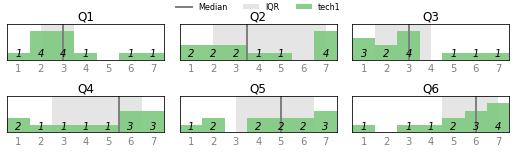

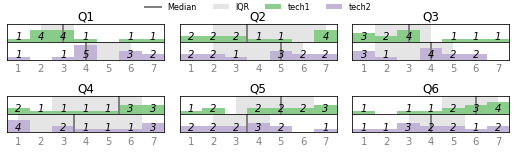

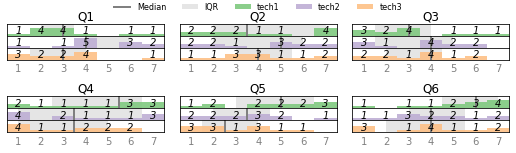

In [3]:
# examples
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']  # the text of questions
scale_num = 7  # 7-point Likert Scale
column_num = 3  # the number of columns for showing charts
colors = ['#7fc97f', '#beaed4', '#fdc086'] # recommend to use ColorBrewer

# test with random data (12 participants)
rating1 = np.random.randint(1, scale_num+1, (len(questions), 12))
rating2 = np.random.randint(1, scale_num+1, (len(questions), 12))
rating3 = np.random.randint(1, scale_num+1, (len(questions), 12))

likertScaleChart('test1.pdf', questions, [
                  rating1], scale_num, column_num, ['tech1'], colors[:1])
likertScaleChart('test2.pdf', questions, [
                  rating1, rating2], scale_num, column_num, ['tech1', 'tech2'], colors[:2])
likertScaleChart('test3.pdf', questions, [
                  rating1, rating2, rating3], scale_num, column_num, ['tech1', 'tech2', 'tech3'], colors)